In [30]:
import numpy as np

In [13]:
import pandas as pd
import matplotlib

import numpy as np
superheroes = pd.read_csv("superheroes.csv")
superheroes.head()


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
1,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
2,10,Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0
3,11,Air-Walker,Male,blue,-,White,188.0,Marvel Comics,-,bad,108.0
4,13,Alan Scott,Male,blue,-,Blond,180.0,DC Comics,-,good,90.0


In [4]:
def gender(series):
    if series == "Male":
        return 0
    elif series == "Female":
        return 1
    

In [7]:
superheroes['GenderR'] = superheroes['Gender'].apply(gender)

In [10]:
superheroes.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,GenderR,Media
0,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0,0.0,Screen
1,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0,1.0,Comic
2,10,Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0,0.0,Comic
3,11,Air-Walker,Male,blue,-,White,188.0,Marvel Comics,-,bad,108.0,0.0,Comic
4,13,Alan Scott,Male,blue,-,Blond,180.0,DC Comics,-,good,90.0,0.0,Comic


In [14]:
def media (series): 
    if series == "Marvel Comics" or series == "DC Comics" or series == "Dark Horse Comics" or series == "Image Comics": 
        return "Comic"
    if series == "NBC - Heroes" : 
        return "Screen"
    if series == "George Lucas" : 
        return "Screen"
    if series == "HarperCollins" : 
        return "Book"
    if series == "Star Trek" : 
        return "Screen"
    if series == "SyFy" : 
        return "Screen"
    if series == "Team Epic TV" : 
        return "Screen"
    if series == "IDW Publishing" : 
        return "Book"
    if series == "ABC Studios" : 
        return "Screen"
    if series == "Shueisha" : 
        return "Unknown"
    if series == "Icon Comics": 
        return "Comic"
    if series == "Wildstorm" : 
        return "Unknown"
    if series == "Sony Pictures" : 
        return "Screen"
    if series == "South Park" : 
        return "Screen"
    if series == "J.R.R. Tolkein" : 
        return "Book"
    if series == "Universal Studios" : 
        return "Screen"
    if series == "Rebellion" : 
        return "Unknown"
    if series == "Titan Books" : 
        return "Book"
    if series == "Hanna-Barbera" : 
        return "Screen"
    if series == "Microsoft" : 
        return "Unknown"
    if series == "J.K. Rowling" : 
        return "Book"

superheroes['Media'] = superheroes['Publisher'].apply(media)


<AxesSubplot:>

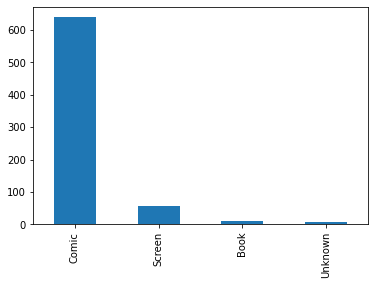

In [16]:
superheroes['Media'].value_counts().plot(kind = 'bar')

In [19]:
# recoding from continuous to categorical

def height_recode (series): 
    if series < 152.4:
        return 0
    if series >= 152.4: 
        return 1

superheroes['Height_5ftYN'] = superheroes['Height'].apply(height_recode)

In [20]:
superheroes.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Media,Height_5ftYN
0,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0,Screen,0
1,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0,Comic,1
2,10,Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0,Comic,1
3,11,Air-Walker,Male,blue,-,White,188.0,Marvel Comics,-,bad,108.0,Comic,1
4,13,Alan Scott,Male,blue,-,Blond,180.0,DC Comics,-,good,90.0,Comic,1


# dummy coding in python using pd.get_dummies

In [22]:
alignmentDummy = pd.get_dummies(superheroes["Alignment"])

In [25]:
alignmentDummy

,-,bad,good,neutral
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
729,0,1,0,0
730,0,1,0,0
731,0,0,1,0
732,0,0,1,0


In [27]:
superheroes1 = pd.concat([superheroes, alignmentDummy], axis = 1)

In [28]:
superheroes1

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Media,Height_5ftYN,-,bad,good,neutral
0,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0,Screen,0,0,0,1,0
1,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0,Comic,1,0,0,1,0
2,10,Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0,Comic,1,0,0,1,0
3,11,Air-Walker,Male,blue,-,White,188.0,Marvel Comics,-,bad,108.0,Comic,1,0,1,0,0
4,13,Alan Scott,Male,blue,-,Blond,180.0,DC Comics,-,good,90.0,Comic,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,17,Alien,Male,-,Xenomorph XX121,No Hair,244.0,Dark Horse Comics,black,bad,169.0,Comic,1,0,1,0,0
730,527,Predator,Male,-,Yautja,-,213.0,Dark Horse Comics,-,bad,234.0,Comic,1,0,1,0,0
731,731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,Screen,0,0,0,1,0
732,274,Gamora,Female,yellow,Zen-Whoberian,Black,183.0,Marvel Comics,green,good,77.0,Comic,1,0,0,1,0


# Missing data

In [33]:
# This is an example of how to see just how many missing values you have:

superheroes.isnull().sum()

Unnamed: 0       0
name             0
Gender           0
Eye color        0
Race             0
Hair color       0
Height           0
Publisher        0
Skin color       0
Alignment        0
Weight           2
Media           17
Height_5ftYN     0
dtype: int64

In [32]:
superheroes['Publisher'] = superheroes1[ 'Publisher' ].replace (np.nan,"Unknown")

In [34]:
superheroes['Weight'] = superheroes['Weight'].replace(np.nan, superheroes.Weight.mean())